In [1]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd

/home/link/miniconda3/envs/bert/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/link/miniconda3/envs/bert/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/link/miniconda3/envs/bert/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/link/miniconda3/envs/bert/lib/python3.6/site-pack

In [ ]:
embedder = SentenceTransformer('distiluse-base-multilingual-cased')

In [230]:
dxy_rumors=pd.read_csv('../data/DXY_rumors.csv')
dxy_rumors = dxy_rumors.drop(['_id','id','summary','sourceUrl','crawlTime'],axis=1)
dxy_rumors = dxy_rumors.drop_duplicates(subset='title', keep='last')
dxy_rumors.title = dxy_rumors.title.str.replace(r'[？?,，。.]','')
dxy_rumors

,title,mainSummary,body,rumorType
2,疫情期间大强度锻炼可提高抵抗力,国家体育总局体育科学研究所研究员徐建方：长时间大强度的运动，会导致身体机能失调，免疫功能下降,在居家防疫期间，为确保运动安全有效，运动强度必须适宜。强度过低，没有锻炼效果，但是长时间大强...,0
3,改用吸痰机后武汉死亡人数减半,刘良教授辟谣：没有干预过任何个例的临床治疗,有传闻称：「病患遗体解剖发现死者肺部出现大量痰栓，而痰栓是由呼吸机使用所产生，致人缺氧而死。...,0
4,吃降压药会增加感染病毒的风险,丁香医生团队辟谣：目前没有任何动物和临床研究数据证实这种说法的可靠性,因现有研究显示ACE2是新型冠状病毒入侵人体的关键，网传服用ACEI（血管紧张素转化酶抑制剂...,0
5,急救改用吸痰机帮助武汉死亡人数减半,刘良教授辟谣：没有干预过任何个例的临床治疗,有传闻称：「病患遗体解剖发现死者肺部出现大量痰栓，而痰栓是由呼吸机使用所产生，致人缺氧而死。...,0
6,可在家使用新冠病毒试剂盒自测,北京市药监局提示：普通市民家庭不可自行使用,近日，有人在朋友圈兜售某公司生产的新冠病毒抗体检测试剂盒，单价150元，并宣称可以家庭自行使...,0
...,...,...,...,...
279,深圳要封城,深圳市互联网信息办公室：是谣言,1月26日下午从深圳市新型冠状病毒感染的肺炎疫情防控工作领导小组办公室获悉，有关深圳市将要“...,0
280,日本派出千名医疗人员,其实是误解,27日下午，网上流传一张日本媒体报道武汉肺炎疫情的截图，配文称“日本派了1000名医疗工作者...,0
281,带呼吸阀的口罩没有用,丁香医生团队辟谣：口罩上有呼吸阀不用担心,呼吸阀的气流是单向向外的，不影响使用者的防护效果。但已经有症状的人，建议不要使用带有呼吸阀的...,0
282,熏醋可以预防新冠,丁香医生团队辟谣：熏醋杀不死新型冠状病毒,一瓶醋里的醋酸含量最多也只有5%。将醋里的醋酸蒸发到空气中的做法，提升空气酸度的空间十分有限...,0


In [265]:
piyao_rumors=pd.read_csv('../data/piyao.csv')
piyao_rumors.title = piyao_rumors.title.str.replace(r'[？?,，：、。.]','')
piyao_rumors

,Unnamed: 0,title,pubtime,linkurl,keyword,editor,author,sourcename
0,0,广西有人3次检测呈阳性,2020-06-28 10:49:26,http://www.piyao.org.cn/2020-06/28/c_121067970...,0,张智萍,NaN,昭平公安
1,1,蚊蝇可以传播新冠病毒,2020-06-28 10:49:51,http://www.piyao.org.cn/2020-06/28/c_121067958...,0,张智萍,NaN,中国新闻网
2,2,南昌民德路锦江之星酒店发现有俄罗斯人患新冠肺炎,2020-06-26 11:05:25,http://www.piyao.org.cn/2020-06/26/c_121067743...,0,张智萍,NaN,央广网
3,4,市民路过中高风险地区健康码会变色,2020-06-24 15:44:27,http://www.piyao.org.cn/2020-06/24/c_121067535...,0,冯栋,张璐,新京报
4,5,上海30天内禁止跨省旅游团,2020-06-24 16:28:01,http://www.piyao.org.cn/2020-06/24/c_121067536...,0,冯栋,白璐,上海网络辟谣
...,...,...,...,...,...,...,...,...
943,995,中国向菲律宾捐赠20万只口罩,2020-02-11 23:21:37,http://www.piyao.org.cn/2020-02/11/c_121046411...,0,张智萍,NaN,中国驻菲律宾大使馆官网
944,996,疫情致广西防城港市玉林市博白县陆川县米粮断供,2020-02-12 08:42:01,http://www.piyao.org.cn/2020-02/12/c_121047075...,0,张智萍,NaN,防城港市市场监管局
945,997,黑龙江省疫情数据翻倍,2020-02-11 22:55:06,http://www.piyao.org.cn/2020-02/11/c_121046876...,0,张智萍,NaN,东北网
946,998,长沙封城株洲封外地户口进不了城一律凭身份证进城,2020-02-12 08:36:35,http://www.piyao.org.cn/2020-02/12/c_121047076...,0,张智萍,NaN,湖南省长沙市交警支队官方微博


In [266]:
corpus = piyao_rumors.title.values

corpus_embeddings = embedder.encode(corpus)

In [267]:
from sklearn.cluster import KMeans

num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

for i in range(num_clusters):
    cluster_corpus = []
    for j in np.where(cluster_assignment==i)[0]:
        cluster_corpus += [corpus[j]]
    print(cluster_corpus,'\n')

['北京市教委发布7条校园“新规”上课全程戴口罩', '网传四川乐山2020年暑假放假和开学时间', '福州市小学预报名6月16日开始', '常州溧阳一小学多名学生发热', '6月6日起河北省应急响应级别下调为三级', '6月6日起北京应急响应级别下调为三级', '全国高等学校外语专业四八级考试上半年不再举行', '北京乘坐公共交通学校上课应戴口罩', '甘肃省确定幼儿园和特殊教育学校开学时间', '重庆放暑假时间定了小学7月5日中学7月11日', '黑龙江高校学生可返校复课', '上海幼儿园6月2日开学中福会幼儿园已通知', '河北明确高校中小学幼儿园复学复课时间', '北京中小学6月开学暑假会推迟', '教育部明确体育课莫戴N95口罩 中高考体育测试项目可适当调整', '2020贵州成高学位考试时间确定', '北京初三年级开学复课', '合肥市2020年中小学幼儿园暑假及秋季学期开学时间定了', '5月24日河北全省开学', '南京五名小学生手拉手跳楼', '上半年全国高等教育自学考试延期至8月举行', '河北衡水民办初高中将在5月末全部开学', '网传“山东2020年春季学期开学通知”', '山东初中毕业年级开学时间确定', '烟台市各学段各年级学生已明确复学返校时间', '网传深圳中小学生5月11日和18日分批返校', '上半年中小学教师资格考试推迟至下半年一并组织', '内蒙古明确学校开学复课时间', '天津开学时间又变了', '5月雅思托福等海外考试取消', '北京市幼升小以及小升初预计推迟至七月', '天津高考时间7月7日-8日中考时间7月18日-19日', '湖北2020年高考时间确定为7月7日至8日', '北京西城区全体中学毕业班于5月15日返校', '今年上半年英语四六级口试取消', '湖北利川高三4月22日开学', '包头各中小学幼儿园本学期不做开学准备', '海口所有学校暂缓开学', '北京市中高考时间及初高三开学时间确定', '太原市各小学幼儿园本学期不做开学准备', '北京某区教委初步确认9月1日前不开学', '山西阳泉各小学幼儿园本学期不做开学准备', '6月份大学英语四六级考试取消', '河北学校定于4月10日开学', '山东高三学生提前开学', '教育部2020年全国高考延期一个月举行 为7月7日至8日', '吉林省高三4月7日开学

Estimated number of clusters: 30


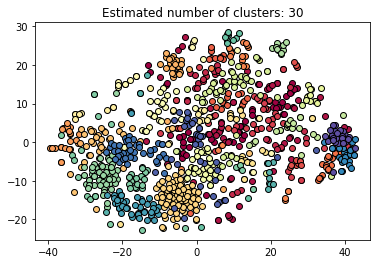

In [277]:
import numpy as np

from sklearn.cluster import Birch
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data

X = StandardScaler().fit_transform(corpus_embeddings)

# #############################################################################\

brc = Birch(n_clusters=30,threshold=0.8)
brc.fit(X)
labels = brc.labels_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print('Estimated number of clusters: %d' % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt


tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 50)
X = tsne.fit_transform(X)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# #############################################################################
clustered_corpus = []
for i in range(len(unique_labels)):
    clustered_corpus += [[]]
    for j in np.where(labels==i)[0]:
        clustered_corpus[i] += [corpus[j]]
#     print(clustered_corpus[i],'\n')

In [278]:
import jieba

In [279]:
def load_stopwords_list(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r').readlines()]
    return stopwords

stopwords_list = load_stopwords_list('../../stopwords/baidu_stopwords.txt')+['新冠','病毒','会','月']
words = jieba.cut(clustered_corpus[0][0])
# print('/'.join(words))

word_count = []
for i in range(len(clustered_corpus)):
    word_count += [{}]
    label_corpus = clustered_corpus[i]
    for j in range(len(label_corpus)):
        sentence = label_corpus[j]
        words = jieba.cut(sentence)
        for word in words:
            if word not in stopwords_list and len(word.strip())>0:
                word_count[i][word] = 1 if word not in word_count[i] else word_count[i][word]+1
output = [sorted(list(x.items()),key=lambda y: y[1], reverse=True) for x in word_count]
output = [x[0:5] for x in output]
for i,count in enumerate(output):
    print(count,'\n','\n'.join([clustered_corpus[i][j] for j in range(10)]),'\n')

[('武汉', 28), ('医院', 7), ('湖北', 5), ('暂停', 4), ('病人', 4)] 
 河北顺平林江商厦卖带鱼的老板被隔离
中国拒绝世卫组织参观武汉实验室
武汉三民小区89岁确诊患者因捡垃圾感染
中通暂停武汉部分区域快递揽派
钟南山去武汉东西湖区了东西湖区健康码转红
武汉实验室“失误证据”被外媒公开
网传佳木斯要建方舱医院用于收纳海归人员
黑龙江返银川一家被确诊
武汉要发消费券
武汉大智路数码港有无症状病人倒地 

[('确诊', 8), ('人', 6), ('小区', 6), ('发布', 6), ('长春', 5)] 
 雄安安新县实施全封闭管理
天津蓟州区下仓镇封村批发水果村民新冠检测阳性
哈尔滨市部分学校出现无症状感染者
大连紧急排查吉林来普王某
长春一摊主感染7家店铺被封
长春有一吉林密切接触者逃跑失踪
跑沈阳线路的大连列车员确诊接触600人
吉林市舒兰市上千人流动至长春
长春客车厂确诊一人是那个洗衣工儿子同学
长春福临家园小区现封闭隔离长江路步行街现已封闭 

[('北京', 16), ('人员', 6), ('隔离', 4), ('疫情', 4), ('日', 4)] 
 北京三类涉疫人群严禁出京 民航铁路对出京人员查验核酸检测阴性证明
北京严格出京管理并不意味着封城
铁路部门公布进出北京地区列车免费退票措施
北京多条高速公路双向封闭谣言
北京地铁为防疫情卸掉座椅
北京解除湖北人员进京限制
北京将继续对社区村实行封闭式管理
国内低风险地区进京出差返京人员不再隔离
北京对津冀来京人员不再实行居家观察
北京西站出现大量白衣人疑似疫情大爆发 

[('疫情', 8), ('不', 7), ('恢复', 5), ('车辆', 5), ('交通运输', 4)] 
 交通运输部端午节及今后一段时期继续暂停省际旅游客运
交通运输部高风险地区地铁满载率应低于50%
常州溧阳一小学多名学生发热
文化和旅游部有序恢复社会艺术水平考级活动
因疫情防控需要沈阳老年人免费乘车政策暂停
因疫情防控需要哈尔滨市暂停老年人免费乘车优惠
长春公共交通老年卡暂停使用
文化和旅游部低风险地区可举办营业性演出活动
张家界武陵源有发热病人进入景区
呼和浩特5月1日起超期车辆要罚款 

[('风险', 9), ('响应', 7), ('6', 7), ('应急',